## Observations and Insights

This drug trial was perfomed on non uniform samples. As some treatments were tested on more mice than others. Futhermore there are slightly more male mice than female. The top performing drugs had a sample significantly larger than that used for the other drugs and thus the results may be skewed. Futhermore there seems to be a positive correlation between the weight of the mouse and the volume of the tumor.

## Dependencies and starter code

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_results = mouse_metadata.merge(study_results)

## Summary statistics

In [80]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = mouse_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()
summary_stats2 = summary_stats[['mean', 'std', '50%']].copy()
summary_stats2['Variance'] = (summary_stats2['std'])**2
summary_stats2['SEM'] = mouse_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_stats2 = summary_stats2.rename(columns={'mean':'Mean', 'std': 'Std Dev', '50%': 'Median'})
summary_stats2

,Mean,Std Dev,Median,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,4.994774,41.557809,24.947764,0.329346
Ceftamin,52.591172,6.268188,51.776157,39.290177,0.469821
Infubinol,52.884795,6.567243,51.820584,43.128684,0.492236
Ketapril,55.235638,8.279709,53.698743,68.553577,0.603860
Naftisol,54.331565,8.134708,52.509285,66.173479,0.596466
Placebo,54.033581,7.821003,52.288934,61.168083,0.581331
Propriva,52.322552,6.507770,50.854632,42.351070,0.512884
Ramicane,40.216745,4.846308,40.673236,23.486704,0.320955
Stelasyn,54.233149,7.710419,52.431737,59.450562,0.573111


## Bar plots

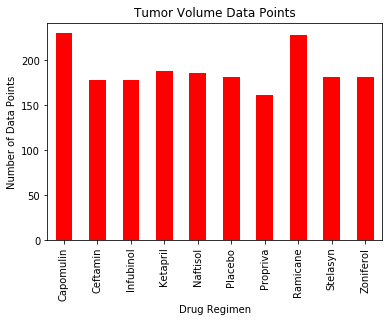

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
grouped_counts = mouse_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].count()
#color = ['r', 'b', 'g', 'y', 'k', 'r', 'b', 'm', 'c', 'w']
plt.figure()
summary_plot = grouped_counts.plot(kind='bar', color = 'r')
summary_plot.set_title("Tumor Volume Data Points")
summary_plot.set_ylabel("Number of Data Points")
plt.show()

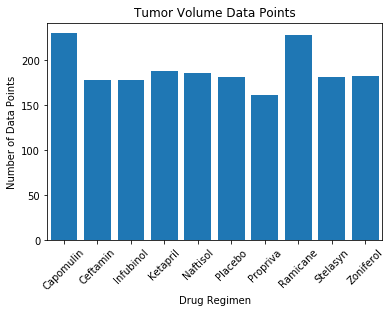

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(0,len(summary_stats))
xticks = [x for x in grouped_counts.keys()]
plt.figure()
plt.bar(x_axis, grouped_counts)
plt.xlim(-0.5 ,x_axis.max() + 0.5)
plt.xticks(x_axis, xticks, rotation='45')
plt.title("Tumor Volume Data Points")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

## Pie plots

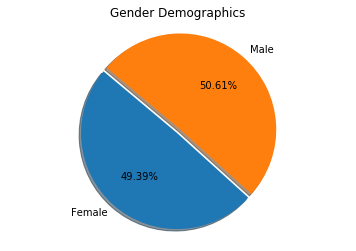

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_demo = mouse_results.groupby('Sex')['Sex'].count()
explode = (0.05,0)
labels = gender_demo.keys()
plt.figure()
pie_plot = gender_demo.plot(kind='pie', explode= explode, shadow=True, 
                            labels = labels, autopct = "%1.2f%%", 
                            startangle = 140)
pie_plot.axis('equal')
pie_plot.set_title('Gender Demographics')
pie_plot.set_ylabel('')
#plt.axis('equal')
plt.show()

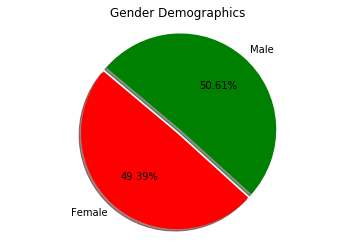

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure()
plt.pie(gender_demo, explode= explode, shadow=True, colors = ['red', 'green'],
        labels = labels, autopct = "%1.2f%%", startangle = 140)
plt.title('Gender Demographics')
plt.axis('equal')
plt.show()

## Quartiles, outliers and boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

grouped_regimen = mouse_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()
grouped_regimen = grouped_regimen.sort_values('mean')
best_treatments = grouped_regimen.index[:4]

for drug in best_treatments:
    
    dataset = mouse_results[mouse_results['Drug Regimen'] == drug]
    
    final_volume = dataset[dataset['Timepoint'] == 45]
    
    final_volume = final_volume[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']] 
    
    quartiles = final_volume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    IQR = upperq-lowerq
    
    print(f"{drug} Summary")
    print("  ")
    print(f"Max: {final_volume['Tumor Volume (mm3)'].max()}")
    print(f"Min: {final_volume['Tumor Volume (mm3)'].min()}")
    print(f"The lower quartile of Tumor Volume is: {round(lowerq,2)} mm3")
    print(f"The upper quartile of Tumor Volume is: {round(upperq,2)} mm3")
    print(f"The interquartile range of Tumor Volume is: {round(IQR,2)} mm3")
    print(f"The median Tumor Volume is: {round(quartiles[0.5],2)} mm3")
    
    lower_bound = lowerq - (1.5*IQR)
    upper_bound = upperq + (1.5*IQR)

    upper_fliers = len(final_volume[final_volume['Tumor Volume (mm3)'] > upper_bound])
    lower_fliers = len(final_volume[final_volume['Tumor Volume (mm3)'] < lower_bound])   
    
    print(f"Values below {round(lower_bound,2)} could be outliers. There are {lower_fliers} of them.")
    print(f"Values above {round(upper_bound,2)} could be outliers. There are {upper_fliers} of them.")

    outliers = upper_fliers + lower_fliers

    print(f"There are {outliers} outliers.")
    
    print("------------------------------------------------------------------------")
    

Ramicane Summary
  
Max: 45.22086888
Min: 22.05012627
The lower quartile of Tumor Volume is: 30.98 mm3
The upper quartile of Tumor Volume is: 38.51 mm3
The interquartile range of Tumor Volume is: 7.53 mm3
The median Tumor Volume is: 34.85 mm3
Values below 19.69 could be outliers. There are 0 of them.
Values above 49.8 could be outliers. There are 0 of them.
There are 0 outliers.
------------------------------------------------------------------------
Capomulin Summary
  
Max: 47.68596303
Min: 23.34359787
The lower quartile of Tumor Volume is: 32.38 mm3
The upper quartile of Tumor Volume is: 40.16 mm3
The interquartile range of Tumor Volume is: 7.78 mm3
The median Tumor Volume is: 37.31 mm3
Values below 20.7 could be outliers. There are 0 of them.
Values above 51.83 could be outliers. There are 0 of them.
There are 0 outliers.
------------------------------------------------------------------------
Propriva Summary
  
Max: 72.45542116
Min: 58.63340414
The lower quartile of Tumor Volume 

Most promising treatments are:
Ramicane, Capomulin, Propriva, Ceftamin


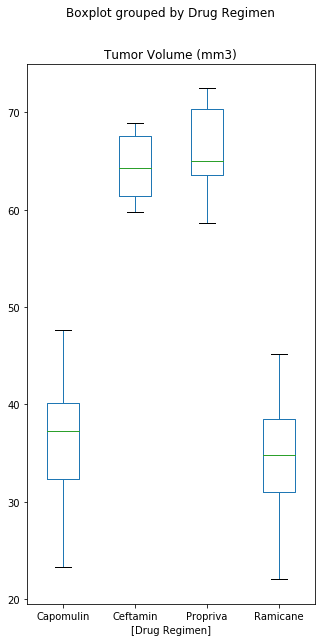

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
print(f"Most promising treatments are:")
print(*best_treatments, sep=', ')

promising_regimen_df = mouse_results[mouse_results['Drug Regimen'].isin(best_treatments)]

#take the final volume
promising_regimen_df = promising_regimen_df[promising_regimen_df['Timepoint'] == 45]

#reset index to mouse ID
promising_regimen_df = promising_regimen_df.set_index('Mouse ID')

#subset datafram for needed variables only
promising_regimen_df = promising_regimen_df[['Drug Regimen', 'Tumor Volume (mm3)']]
promising_regimen_df.boxplot(by='Drug Regimen', grid=False, figsize=(5,10), return_type='dict')

plt.show()

In [14]:
regimen_of_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
for drug in regimen_of_interest:
    
    dataset = mouse_results[mouse_results['Drug Regimen'] == drug]
    
    final_volume = dataset[dataset['Timepoint'] == 45]
    
    final_volume = final_volume[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']] 
    
    quartiles = final_volume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    IQR = upperq-lowerq
    
    print(f"{drug} Summary")
    print("  ")
    print(f"Max: {final_volume['Tumor Volume (mm3)'].max()}")
    print(f"Min: {final_volume['Tumor Volume (mm3)'].min()}")
    print(f"The lower quartile of Tumor Volume is: {round(lowerq,2)} mm3")
    print(f"The upper quartile of Tumor Volume is: {round(upperq,2)} mm3")
    print(f"The interquartile range of Tumor Volume is: {round(IQR,2)} mm3")
    print(f"The median Tumor Volume is: {round(quartiles[0.5],2)} mm3")
    
    lower_bound = lowerq - (1.5*IQR)
    upper_bound = upperq + (1.5*IQR)

    upper_fliers = len(final_volume[final_volume['Tumor Volume (mm3)'] > upper_bound])
    lower_fliers = len(final_volume[final_volume['Tumor Volume (mm3)'] < lower_bound])   
    
    print(f"Values below {round(lower_bound,2)} could be outliers. There are {lower_fliers} of them.")
    print(f"Values above {round(upper_bound,2)} could be outliers. There are {upper_fliers} of them.")

    outliers = upper_fliers + lower_fliers

    print(f"There are {outliers} outliers.")
    
    print("------------------------------------------------------------------------")

Capomulin Summary
  
Max: 47.68596303
Min: 23.34359787
The lower quartile of Tumor Volume is: 32.38 mm3
The upper quartile of Tumor Volume is: 40.16 mm3
The interquartile range of Tumor Volume is: 7.78 mm3
The median Tumor Volume is: 37.31 mm3
Values below 20.7 could be outliers. There are 0 of them.
Values above 51.83 could be outliers. There are 0 of them.
There are 0 outliers.
------------------------------------------------------------------------
Ramicane Summary
  
Max: 45.22086888
Min: 22.05012627
The lower quartile of Tumor Volume is: 30.98 mm3
The upper quartile of Tumor Volume is: 38.51 mm3
The interquartile range of Tumor Volume is: 7.53 mm3
The median Tumor Volume is: 34.85 mm3
Values below 19.69 could be outliers. There are 0 of them.
Values above 49.8 could be outliers. There are 0 of them.
There are 0 outliers.
------------------------------------------------------------------------
Infubinol Summary
  
Max: 72.2267309
Min: 60.91876652
The lower quartile of Tumor Volume 

The regimens of interest are:
Capomulin, Ramicane, Infubinol, Ceftamin


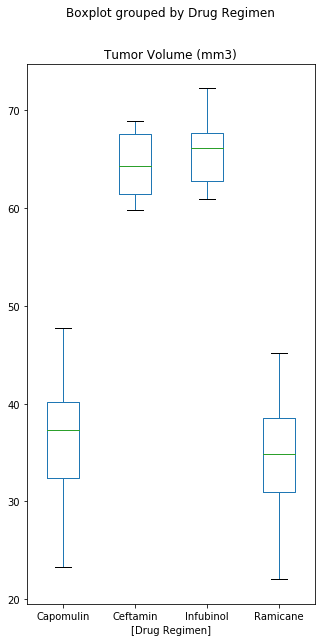

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

regimen_of_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

print(f"The regimens of interest are:")
print(*regimen_of_interest, sep=', ')

selected_regimens_df = mouse_results[mouse_results['Drug Regimen'].isin(regimen_of_interest)]

#take the final volume
selected_regimens_df = selected_regimens_df[selected_regimens_df['Timepoint'] == 45]

#reset index to mouse ID
selected_regimens_df = selected_regimens_df.set_index('Mouse ID')

#subset datafram for needed variables only
selected_regimens_df = selected_regimens_df[['Drug Regimen', 'Tumor Volume (mm3)']]
selected_regimens_df.boxplot(by='Drug Regimen', grid=False, figsize=(5,10), return_type='dict')

plt.show()

## Line and scatter plots

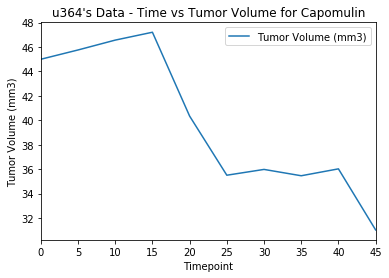

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
selected_drug = 'Capomulin'
mice_to_select = random.randrange(0,summary_stats.loc[selected_drug,'count'])
sample = mouse_results[mouse_results['Drug Regimen']== selected_drug]
sample = sample.reset_index(drop=True)
selected_mouse_id = sample.loc[mice_to_select, 'Mouse ID']
selected_mouse_data = sample[sample['Mouse ID']== selected_mouse_id]

plot_data = selected_mouse_data[['Tumor Volume (mm3)', 'Timepoint']]
plot_data = plot_data.set_index('Timepoint')
#plt.figure()
line_plot = plot_data.plot(kind='line')
line_plot.set_title(f"{selected_mouse_id}'s Data - Time vs Tumor Volume for {selected_drug}")
line_plot.set_ylabel('Tumor Volume (mm3)')
plt.show()

The correlation between both factors is 0.84


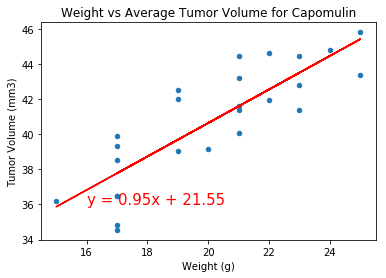

In [71]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
selected_drug = 'Capomulin'
summary_by_drug = mouse_results.groupby('Drug Regimen').mean()
dataset = mouse_results[mouse_results['Drug Regimen']== selected_drug]
grouped_dataset = dataset.groupby('Mouse ID').mean()
grouped_dataset = grouped_dataset[['Tumor Volume (mm3)', 'Weight (g)']]
#grouped_dataset = grouped_dataset.reset_index(drop=True)
grouped_dataset

#plt.figure()
scatter_plot = grouped_dataset.plot(kind='scatter', x = 'Weight (g)', y= 'Tumor Volume (mm3)')
scatter_plot.set_title(f"Weight vs Average Tumor Volume for {selected_drug}")

# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
mice_weight = grouped_dataset['Weight (g)']
avg_tumor_volume = grouped_dataset['Tumor Volume (mm3)']
correlation = st.pearsonr(mice_weight, avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mice_weight, avg_tumor_volume)
regress_values = mice_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(f"The regression equation is {line_eq}")
#plt.scatter(mice_weight,avg_tumor_volume)
scatter_plot.plot(mice_weight,regress_values,"r-")
scatter_plot.annotate(line_eq,(16,36),fontsize=15, color="red")
#scatter_plot.set_ylabels('')
plt.show()
#scatter_plot.plot(mice_weight,regress_values,"r-")
#scatter_plot.annotate(s=line_eq,xy=(16,36),fontsize=20, color="red")
#plt.figure()

In [85]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
mice_weight = grouped_dataset['Weight (g)']
avg_tumor_volume = grouped_dataset['Tumor Volume (mm3)']
correlation = st.pearsonr(mice_weight, avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mice_weight, avg_tumor_volume)
regress_values = mice_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The regression equation is {line_eq}")
#plt.scatter(mice_weight,avg_tumor_volume)
scatter_plot.plot(mice_weight,regress_values,"r-")
#scatter_plot.plot(mice_weight,regress_values,"r-")
#plt.annotate(line_eq,(34,36),fontsize=5, color="red")
#scatter_plot.annotate(line_eq,(16,36),fontsize=5, color="red")
#plt.xlabel('Weight (g)')
#plt.ylabel('Tumor Volume (mm3)')
plt.figure()
plt.show()

The correlation between both factors is 0.84
The regression equation is y = 0.95x + 21.55


<Figure size 432x288 with 0 Axes>